# 층화 표집(Stratified Sampling) 예제
- 전체 vertex 들을 displacement 속성 기준으로 층(stratum) 으로 나눈 뒤, 각 층에서 일정 비율로 표본을 추출하는 방식입니다.
- 클래스 불균형, 중요한 속성 기준 대표성 확보하기 위해 사용

In [1]:
import numpy as np

def compute_displacement_magnitude(attributes):
    return np.linalg.norm(attributes, axis=1)

## 층화 기준 정하기
 - displacement magnitude 기준 quantile 로 층 나누기
 - 여기서는 4개 층으로 나누기

In [2]:
def stratify_by_quantiles(values, num_strata=4):
    quantiles = np.percentile(values, np.linspace(0, 100, num_strata + 1))
    strata_indices = np.digitize(values, bins=quantiles[1:-1], right=True)
    return strata_indices  # N개의 strata index (0 ~ num_strata-1)

## 각 층에서 일정 비율로 샘플링

In [3]:
def stratified_sample(strata_indices, sample_ratio=0.1, seed=42):
    np.random.seed(seed)
    sampled_indices = []
    for stratum in np.unique(strata_indices):
        stratum_indices = np.where(strata_indices == stratum)[0]
        n_samples = max(1, int(len(stratum_indices) * sample_ratio))
        sampled = np.random.choice(stratum_indices, size=n_samples, replace=False)
        sampled_indices.append(sampled)
    return np.concatenate(sampled_indices)


# 전체 통합 함수

In [4]:
def stratified_sampling_from_mesh(vertices, attributes, num_strata=4, sample_ratio=0.1):
    displacement_magnitude = compute_displacement_magnitude(attributes)
    strata = stratify_by_quantiles(displacement_magnitude, num_strata=num_strata)
    sampled_indices = stratified_sample(strata, sample_ratio=sample_ratio)
    
    sampled_vertices = vertices[sampled_indices]
    sampled_attributes = attributes[sampled_indices]
    
    return sampled_vertices, sampled_attributes, sampled_indices


In [6]:
import matplotlib.pyplot as plt

def plot_strata_histograms(displacement_magnitude, strata_indices, num_bins=30):
    unique_strata = np.unique(strata_indices)
    num_strata = len(unique_strata)

    plt.figure(figsize=(15, 3 * num_strata))
    
    for i, stratum in enumerate(unique_strata):
        stratum_values = displacement_magnitude[strata_indices == stratum]
        plt.subplot(num_strata, 1, i + 1)
        plt.hist(stratum_values, bins=num_bins, color='skyblue', edgecolor='black')
        plt.title(f"Stratum {stratum} (n={len(stratum_values)})")
        plt.xlabel("Displacement Magnitude")
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()


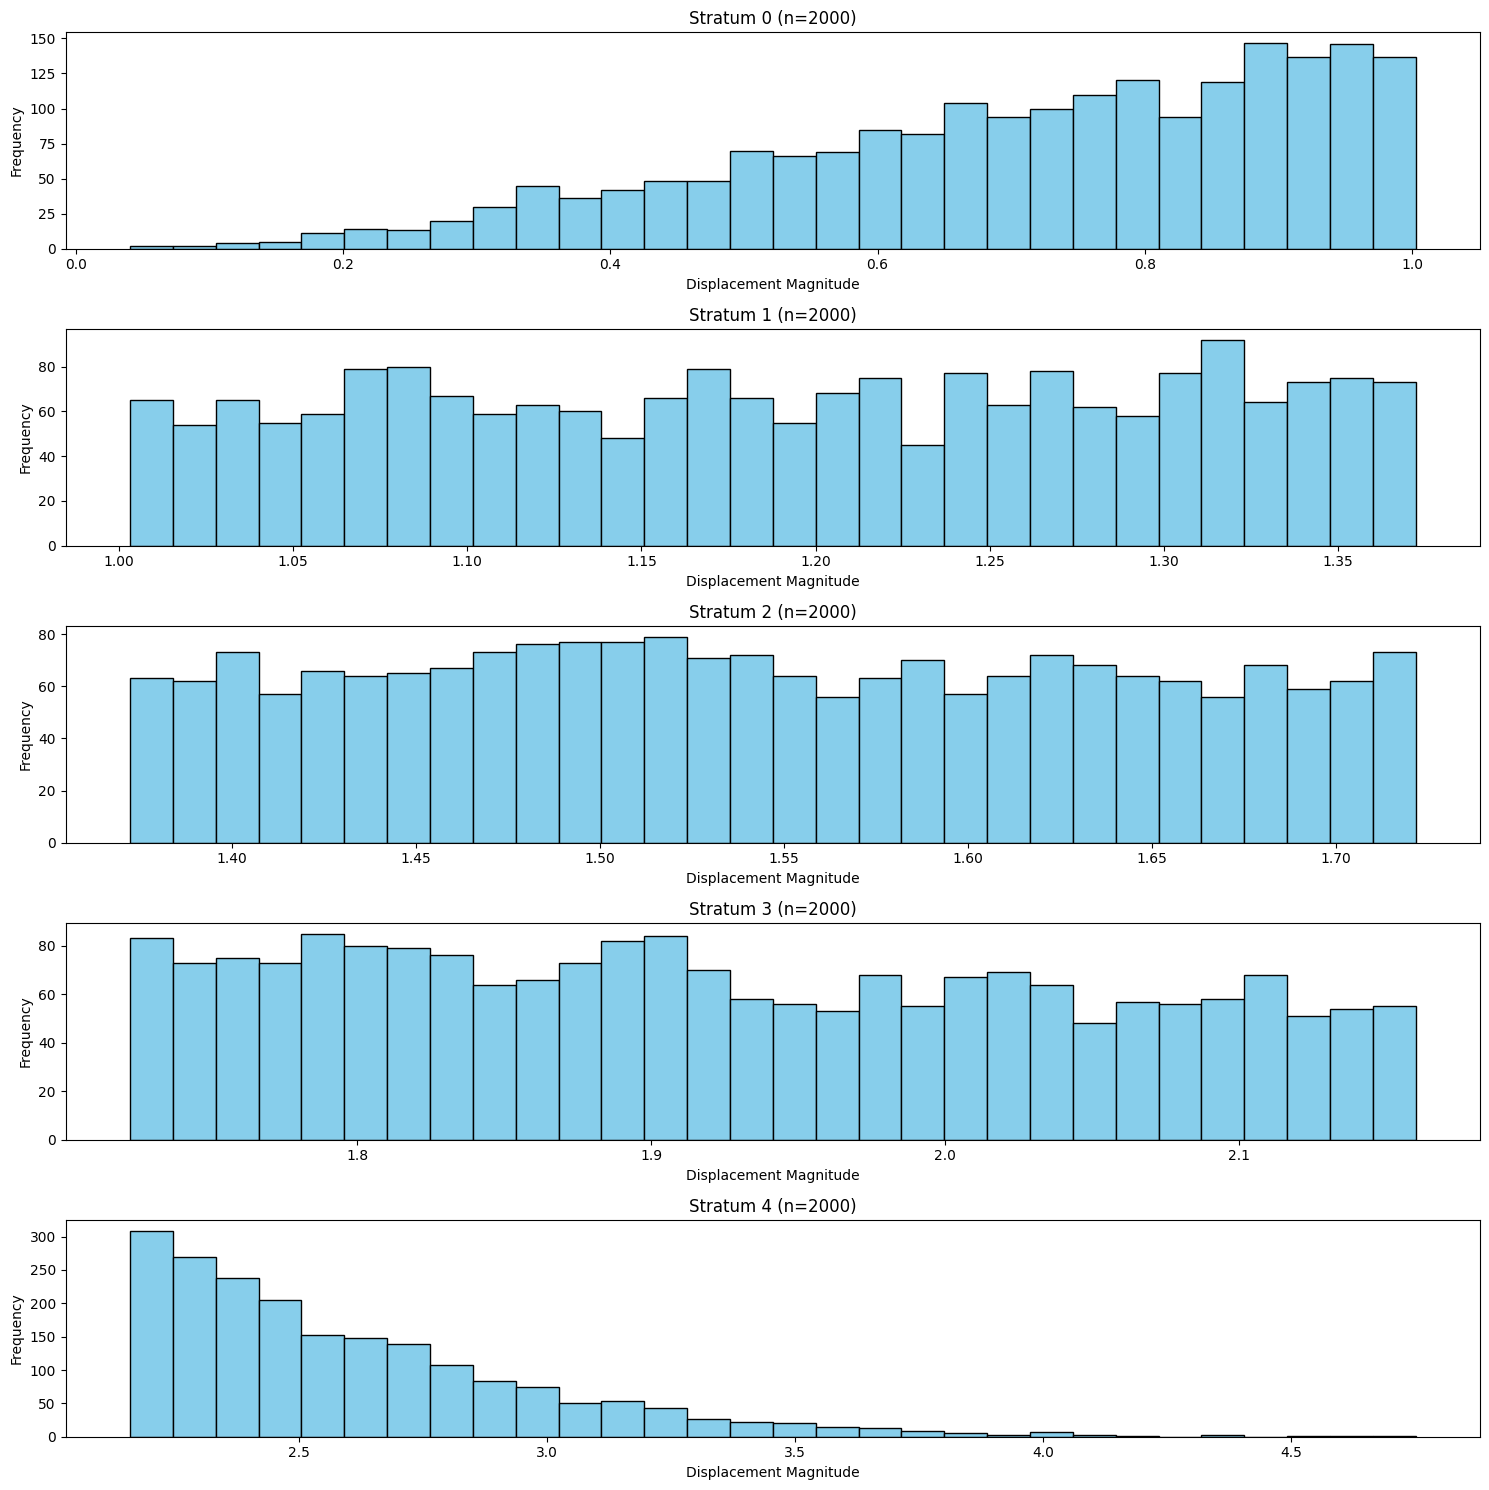

In [7]:
# 1. 데이터 생성
N = 10000
vertices = np.random.rand(N, 3)
attributes = np.random.normal(0, 1, size=(N, 3))

# 2. Displacement magnitude 계산
displacement_magnitude = compute_displacement_magnitude(attributes)

# 3. Strata 생성
strata_indices = stratify_by_quantiles(displacement_magnitude, num_strata=5)

# 4. 히스토그램 출력
plot_strata_histograms(displacement_magnitude, strata_indices)

# 5. 층화 표집
sampled_vertices, sampled_attributes, sampled_indices = stratified_sample(
    strata_indices, sample_ratio=0.05
), attributes, vertices
